## RANSAC

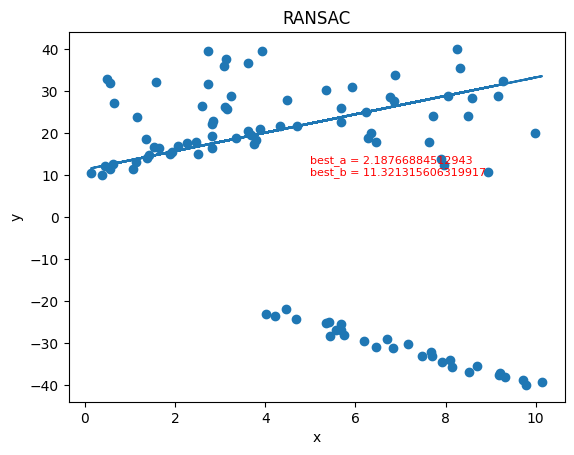

In [3]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

## Geometric and Learning Approaches within2SLAM systems
## based on https://zhuanlan.zhihu.com/p/62238520

import numpy as np
import matplotlib.pyplot as plt
import random
import math

# 数据量。
SIZE = 50
# 产生数据。np.linspace 返回一个一维数组，SIZE指定数组长度。
# 数组最小值是0，最大值是10。所有元素间隔相等。
X = np.linspace(0, 10, SIZE)
Y = []
for i in range(SIZE):
    if i <20:
        y = 3 * X[i] + 10
    else:
        y = -3* X[i] -10
    Y.append(y)

fig = plt.figure()
# 画图区域分成1行1列。选择第一块区域。
ax1 = fig.add_subplot(1,1, 1)
# 标题
ax1.set_title("RANSAC")


# 让散点图的数据更加随机并且添加一些噪声。
random_x = []
random_y = []
# 添加直线随机噪声
for i in range(SIZE):
    random_x.append(X[i] + random.uniform(-0.5, 0.5)) 
    random_y.append(Y[i] + random.uniform(-0.5, 0.5)) 
# 添加随机噪声
for i in range(SIZE):
    random_x.append(random.uniform(0,10))
    random_y.append(random.uniform(10,40))
RANDOM_X = np.array(random_x) # 散点图的横轴。
RANDOM_Y = np.array(random_y) # 散点图的纵轴。

# 画散点图。
ax1.scatter(RANDOM_X, RANDOM_Y)
# 横轴名称。
ax1.set_xlabel("x")
# 纵轴名称。
ax1.set_ylabel("y")

# 使用RANSAC算法估算模型
# 迭代最大次数，每次得到更好的估计会优化iters的数值
iters = 100000
# 数据和模型之间可接受的差值
sigma = 0.25
# 最好模型的参数估计和内点数目
best_a = 0
best_b = 0
pretotal = 0
# 希望的得到正确模型的概率
P = 0.99
for i in range(iters):
    # 随机在数据中选出两个点去求解模型
    sample_index = random.sample(range(SIZE * 2),2)
    x_1 = RANDOM_X[sample_index[0]]
    x_2 = RANDOM_X[sample_index[1]]
    y_1 = RANDOM_Y[sample_index[0]]
    y_2 = RANDOM_Y[sample_index[1]]

    # y = ax + b 求解出a，b
    a = (y_2 - y_1) / (x_2 - x_1)
    b = y_1 - a * x_1

    # 算出内点数目
    total_inlier = 0
    for index in range(SIZE * 2):
        y_estimate = a * RANDOM_X[index] + b
        if abs(y_estimate - RANDOM_Y[index]) < sigma:
            total_inlier = total_inlier + 1

    # 判断当前的模型是否比之前估算的模型好
    if total_inlier > pretotal:
        #iters = math.log(1 - P) / math.log(1 - pow(total_inlier / (SIZE * 2), 2))
        pretotal = total_inlier
        best_a = a
        best_b = b

    # 判断是否当前模型已经符合超过一半的点
    if total_inlier > SIZE:
        break

# 用我们得到的最佳估计画图
Y = best_a * RANDOM_X + best_b

# 直线图
ax1.plot(RANDOM_X, Y)
text = "best_a = " + str(best_a) + "\nbest_b = " + str(best_b)
plt.text(5,10, text,
         fontdict={'size': 8, 'color': 'r'})
plt.show()